In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fbprophet

import datetime as dt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
data = pd.read_csv('test - testdata.csv')

In [4]:
data = data[:100]
data

,Date,Average
0,2021-07-01,3.754167
1,2021-07-02,3.735294
2,2021-07-03,3.750000
3,2021-07-04,3.730769
4,2021-07-05,3.715517
...,...,...
95,2021-10-04,2.700000
96,2021-10-05,2.729167
97,2021-10-06,2.717391
98,2021-10-07,2.727273


In [6]:
prophet_df = data.copy()
prophet_df.rename(columns={'Average': 'y', 'Date': 'ds'}, inplace=True)

prophet_df.head()

,ds,y
0,2021-07-01,3.754167
1,2021-07-02,3.735294
2,2021-07-03,3.750000
3,2021-07-04,3.730769
4,2021-07-05,3.715517


In [7]:
m = fbprophet.Prophet()

m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# Create Future dates
fut_prices = m.make_future_dataframe(periods=100)

# Predict Prices
forecast = m.predict(fut_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
195,2022-01-12,2.351913,1.505352,3.249674
196,2022-01-13,2.346379,1.483173,3.260370
197,2022-01-14,2.344218,1.464798,3.284847
198,2022-01-15,2.344450,1.466152,3.303299
199,2022-01-16,2.334072,1.432841,3.314989


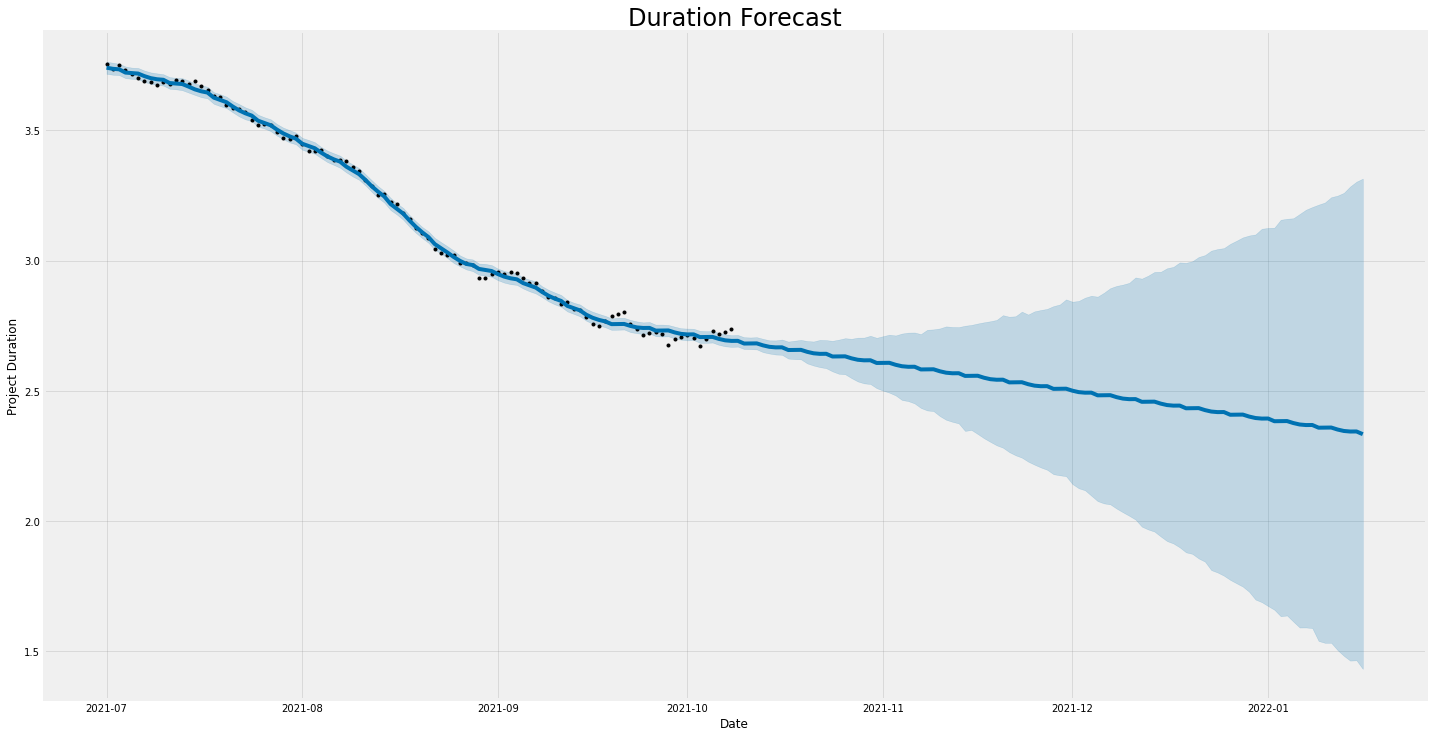

In [11]:
import datetime as dt
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2021, 7, 1)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2020, 10, 8)
trend_date1 = mdates.date2num(trend_date)

fig = m.plot(forecast, figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_title("Duration Forecast", fontsize=24)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Project Duration", fontsize=12)

plt.show()